In [1]:
# Import our dependencies

import pandas as pd


#  Import and read the charity_data.csv.
import pandas as pd 
track_df = pd.read_csv("C:\\Users\\rushi\\Downloads\\spotify\\abedasalsabil spotify main cleaning%20\\cleaning\\Resources\\clean_May_tracks.csv")

In [2]:
track_df.head(5)

,track.name,album_name,album_type,popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artist
0,#Sarkanbaltsarkanais,#Sarkanbaltsarkanais,single,38.0,0.738,0.785,11,-5.003,0.1040,0.0608,0.00000,0.403,0.6260,110.118,Bermudu Divstūris
1,'Til We Meet Again,MY WORLD - The 3rd Mini Album,single,63.0,0.474,0.857,5,-2.577,0.0571,0.1340,0.00000,0.113,0.5520,155.710,aespa
2,00:00,00:00,single,60.0,0.563,0.572,4,-8.769,0.1250,0.6400,0.00227,0.100,0.3920,95.013,Lartiste
3,0321,0321,single,67.0,0.658,0.417,2,-6.485,0.0366,0.6250,0.00000,0.132,0.0748,171.974,space x
4,085 - Ao Vivo,Pode Crê (Ao Vivo),album,83.0,0.850,0.655,2,-2.891,0.0298,0.2110,0.00000,0.952,0.7970,106.031,MC Rogerinho


# Feature Engineering -
Since our goal is to be able to identify which tracks will be popular, we need to feature engineer a new column by binarizing the popularity column. To be able to do this, we need to decide on a cut-off point of popularity score which if a song stays above this cut-off point it will be considered "popular" and if it stays below it will be considered "not popular". We can start off by taking a look at the distribution of the popularity score distribution.

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

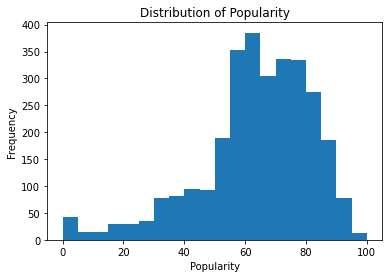

Mean Popularity: 63.282241728561786
Median Popularity: 65.0
75th Percentile Popularity: 77.0


In [4]:
# Distribution of popularity

import matplotlib.pyplot as plt

# Plot a histogram of the 'popularity' feature
plt.hist(track_df['popularity'], bins=20)
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.title('Distribution of Popularity')
plt.show()

# Calculate summary statistics
popularity_mean = track_df['popularity'].mean()
popularity_median = track_df['popularity'].median()
popularity_percentile = track_df['popularity'].quantile(0.75)

print("Mean Popularity:", popularity_mean)
print("Median Popularity:", popularity_median)
print("75th Percentile Popularity:", popularity_percentile)

In [5]:
#creating is_popular column with our cutoff point
track_df['is_popular']=(track_df['popularity']>=65).astype('int')
track_df.head()

,track.name,album_name,album_type,popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artist,is_popular
0,#Sarkanbaltsarkanais,#Sarkanbaltsarkanais,single,38.0,0.738,0.785,11,-5.003,0.1040,0.0608,0.00000,0.403,0.6260,110.118,Bermudu Divstūris,0
1,'Til We Meet Again,MY WORLD - The 3rd Mini Album,single,63.0,0.474,0.857,5,-2.577,0.0571,0.1340,0.00000,0.113,0.5520,155.710,aespa,0
2,00:00,00:00,single,60.0,0.563,0.572,4,-8.769,0.1250,0.6400,0.00227,0.100,0.3920,95.013,Lartiste,0
3,0321,0321,single,67.0,0.658,0.417,2,-6.485,0.0366,0.6250,0.00000,0.132,0.0748,171.974,space x,1
4,085 - Ao Vivo,Pode Crê (Ao Vivo),album,83.0,0.850,0.655,2,-2.891,0.0298,0.2110,0.00000,0.952,0.7970,106.031,MC Rogerinho,1


In [6]:
#dropping popularity score column since we will not be using it
track_df.drop(['popularity', 'artist', 'track.name'], axis=1, inplace=True)
track_df.head()

,album_name,album_type,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,is_popular
0,#Sarkanbaltsarkanais,single,0.738,0.785,11,-5.003,0.1040,0.0608,0.00000,0.403,0.6260,110.118,0
1,MY WORLD - The 3rd Mini Album,single,0.474,0.857,5,-2.577,0.0571,0.1340,0.00000,0.113,0.5520,155.710,0
2,00:00,single,0.563,0.572,4,-8.769,0.1250,0.6400,0.00227,0.100,0.3920,95.013,0
3,0321,single,0.658,0.417,2,-6.485,0.0366,0.6250,0.00000,0.132,0.0748,171.974,1
4,Pode Crê (Ao Vivo),album,0.850,0.655,2,-2.891,0.0298,0.2110,0.00000,0.952,0.7970,106.031,1


We dropped popularity scores since we already binarized that column, but additionally we are dropping 'artist' and 'track_name' since we are looking at the anatomy of a song and not who sings it or what it's called. The goal is to identify songs that will become popular without being affected by the artist's name since we would also like to find songs from up-and-coming artists.

# Logistic Regression Model with the Original Data

In [7]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report
import tensorflow as tf

In [8]:
#Split the data into features (X) and target (y)
y = track_df[['is_popular']]
X = track_df[[ 'energy', 'loudness']]

In [12]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
x_train,x_test,y_train,y_test= train_test_split(X,y)

In [14]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
logistic_regression_model = LogisticRegression(random_state=1)

# Fit the model using training data
lr_model = logistic_regression_model.fit(x_train, y_train)

C:\Users\rushi\anaconda3\envs\pythondata\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [15]:
# Make a prediction using the testing data
testing_predictions = lr_model.predict(x_test)

In [16]:
# Print the balanced_accuracy score of the model
print(f"Training Data Score: {lr_model.score(x_train, y_train)}")
print(f"Testing Data Score: {lr_model.score(x_test, y_test)}")

from sklearn.metrics import accuracy_score
print(f"Balanced Accuracy Score: {balanced_accuracy_score(y_test, testing_predictions)}")

Training Data Score: 0.5983791085096803
Testing Data Score: 0.5748987854251012
Balanced Accuracy Score: 0.5726127320954907


In [17]:
# Generate a confusion matrix for the model
from sklearn.metrics import confusion_matrix

testing_matrix = confusion_matrix(y_test, testing_predictions)
print(testing_matrix)

[[161 203]
 [112 265]]


In [18]:
# Print the classification report for the model
testing_report = classification_report(y_test, testing_predictions)

print(testing_report)

              precision    recall  f1-score   support

           0       0.59      0.44      0.51       364
           1       0.57      0.70      0.63       377

    accuracy                           0.57       741
   macro avg       0.58      0.57      0.57       741
weighted avg       0.58      0.57      0.57       741



For the "0" label (NOT POPULAR), the precision is 0.59, indicating that the model  predicts not popular track with a precision of 0.59%. For the "1" label (popular), the precision is 0.57, meaning that when the model predicts popular track , it is correct around 57% of the time.

For the "0" label (Not popular), the recall is 0.44, . For the "1" label (POPULAR), the recall is 0.70, meaning that the model captures approximately 70% of the actual popular track.

Overall, the logistic regression model demonstrates  predictive performance for both the "0" and "1" labels.

# Predict a Logistic Regression Model with Resampled Training Data

In [19]:
# Import the RandomOverSampler module form imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

# Instantiate the random oversampler model
# # Assign a random_state parameter of 1 to the model
ROS = RandomOverSampler(random_state=1)

# Fit the original training data to the random_oversampler model
x_resampled, y_resampled= ROS.fit_resample(x_train, y_train)

In [20]:
# Count the distinct values of the resampled labels data
y_resampled.value_counts()

is_popular
0             1148
1             1148
dtype: int64

In [21]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
from sklearn.linear_model import LogisticRegression
ros_model = LogisticRegression(solver='lbfgs', random_state=1)


# Fit the model using the resampled training data
ros_model.fit(x_resampled, y_resampled)


# Make a prediction using the testing data
y_prediction = ros_model.predict(x_test)

C:\Users\rushi\anaconda3\envs\pythondata\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [22]:
# Print the balanced_accuracy score of the model 
print(f"Training Data Score: {ros_model.score(x_train, y_train)}")
print(f"Testing Data Score: {ros_model.score(x_test, y_test)}")

from sklearn.metrics import accuracy_score
# Display the accuracy score for the test dataset.
print(f"Balanced Accuracy Score: {balanced_accuracy_score(y_test, y_prediction)}")

Training Data Score: 0.5938766321476813
Testing Data Score: 0.5856950067476383
Balanced Accuracy Score: 0.584596438044714


In [23]:
# Generate a confusion matrix for the model
from sklearn.metrics import confusion_matrix
ros_testing_matrix = confusion_matrix(y_test, y_prediction)
print(ros_testing_matrix)

[[190 174]
 [133 244]]


In [24]:
# Print the classification report for the model
ros_testing_report = classification_report(y_test, y_prediction)

print(ros_testing_report)

              precision    recall  f1-score   support

           0       0.59      0.52      0.55       364
           1       0.58      0.65      0.61       377

    accuracy                           0.59       741
   macro avg       0.59      0.58      0.58       741
weighted avg       0.59      0.59      0.58       741



# Deep learning

In [25]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [26]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [27]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 9
hidden_nodes_layer2 = 18

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 9)                 27        
                                                                 
 dense_1 (Dense)             (None, 18)                180       
                                                                 
 dense_2 (Dense)             (None, 1)                 19        
                                                                 
Total params: 226
Trainable params: 226
Non-trainable params: 0
_________________________________________________________________


In [28]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [29]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
70/70 [==============================] - 1s 2ms/step - loss: 0.6863 - accuracy: 0.5633
Epoch 2/100
70/70 [==============================] - 0s 2ms/step - loss: 0.6794 - accuracy: 0.5862
Epoch 3/100
70/70 [==============================] - 0s 3ms/step - loss: 0.6754 - accuracy: 0.5813
Epoch 4/100
70/70 [==============================] - 0s 2ms/step - loss: 0.6724 - accuracy: 0.5822
Epoch 5/100
70/70 [==============================] - 0s 2ms/step - loss: 0.6710 - accuracy: 0.5862
Epoch 6/100
70/70 [==============================] - 0s 2ms/step - loss: 0.6698 - accuracy: 0.5894
Epoch 7/100
70/70 [==============================] - 0s 2ms/step - loss: 0.6694 - accuracy: 0.5903
Epoch 8/100
70/70 [==============================] - 0s 2ms/step - loss: 0.6688 - accuracy: 0.5925
Epoch 9/100
70/70 [==============================] - 0s 2ms/step - loss: 0.6686 - accuracy: 0.5907
Epoch 10/100
70/70 [==============================] - 0s 1ms/step - loss: 0.6678 - accuracy: 0.5889
Epoch 11/

In [30]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

24/24 - 0s - loss: 0.6634 - accuracy: 0.5965 - 253ms/epoch - 11ms/step
Loss: 0.6633514761924744, Accuracy: 0.5964912176132202


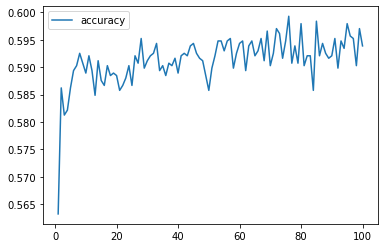

In [31]:
# plotting the accuracy
history_df = pd.DataFrame(fit_model.history, index = range(1, len(fit_model.history['loss'])+1))
history_df.plot(y = 'accuracy')

cutoff = 65 ,layer1 = 9 : activation function = relu layer2 = 18 : activation function = relu

Loss: 0.6687909960746765, Accuracy: 0.584856390953064

A loss value of 66 indicates that the model can be further optimized. The accuracy percent shows that 58% of the model's predicted values align with the true values in the original dataset.

# Adding hidden layer

In [32]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 9
hidden_nodes_layer2 = 18
hidden_nodes_layer3 = 27

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))





# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 9)                 27        
                                                                 
 dense_4 (Dense)             (None, 18)                180       
                                                                 
 dense_5 (Dense)             (None, 27)                513       
                                                                 
 dense_6 (Dense)             (None, 1)                 28        
                                                                 
Total params: 748
Trainable params: 748
Non-trainable params: 0
_________________________________________________________________


In [33]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [34]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
70/70 [==============================] - 1s 2ms/step - loss: 0.6841 - accuracy: 0.5597
Epoch 2/100
70/70 [==============================] - 0s 2ms/step - loss: 0.6779 - accuracy: 0.5786
Epoch 3/100
70/70 [==============================] - 0s 2ms/step - loss: 0.6740 - accuracy: 0.5889
Epoch 4/100
70/70 [==============================] - 0s 2ms/step - loss: 0.6699 - accuracy: 0.5912
Epoch 5/100
70/70 [==============================] - 0s 2ms/step - loss: 0.6684 - accuracy: 0.5898
Epoch 6/100
70/70 [==============================] - 0s 2ms/step - loss: 0.6678 - accuracy: 0.5894
Epoch 7/100
70/70 [==============================] - 0s 2ms/step - loss: 0.6669 - accuracy: 0.5867
Epoch 8/100
70/70 [==============================] - 0s 2ms/step - loss: 0.6662 - accuracy: 0.5898
Epoch 9/100
70/70 [==============================] - 0s 2ms/step - loss: 0.6660 - accuracy: 0.5862
Epoch 10/100
70/70 [==============================] - 0s 2ms/step - loss: 0.6662 - accuracy: 0.5840
Epoch 11/

In [35]:
#Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

24/24 - 0s - loss: 0.6670 - accuracy: 0.5803 - 224ms/epoch - 9ms/step
Loss: 0.6669703722000122, Accuracy: 0.5802968740463257


# Changing activation

In [36]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 9
hidden_nodes_layer2 = 18
hidden_nodes_layer3 = 27


nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="tanh"))




# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 9)                 27        
                                                                 
 dense_8 (Dense)             (None, 18)                180       
                                                                 
 dense_9 (Dense)             (None, 27)                513       
                                                                 
 dense_10 (Dense)            (None, 1)                 28        
                                                                 
Total params: 748
Trainable params: 748
Non-trainable params: 0
_________________________________________________________________


In [37]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [38]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
70/70 [==============================] - 1s 2ms/step - loss: 0.6885 - accuracy: 0.5412
Epoch 2/100
70/70 [==============================] - 0s 2ms/step - loss: 0.6760 - accuracy: 0.5898
Epoch 3/100
70/70 [==============================] - 0s 2ms/step - loss: 0.6745 - accuracy: 0.5979
Epoch 4/100
70/70 [==============================] - 0s 2ms/step - loss: 0.6736 - accuracy: 0.5894
Epoch 5/100
70/70 [==============================] - 0s 2ms/step - loss: 0.6729 - accuracy: 0.5876
Epoch 6/100
70/70 [==============================] - 0s 2ms/step - loss: 0.6724 - accuracy: 0.5831
Epoch 7/100
70/70 [==============================] - 0s 2ms/step - loss: 0.6716 - accuracy: 0.5885
Epoch 8/100
70/70 [==============================] - 0s 2ms/step - loss: 0.6707 - accuracy: 0.5912
Epoch 9/100
70/70 [==============================] - 0s 2ms/step - loss: 0.6694 - accuracy: 0.5898
Epoch 10/100
70/70 [==============================] - 0s 2ms/step - loss: 0.6688 - accuracy: 0.5831
Epoch 11/

In [39]:
#Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

24/24 - 0s - loss: 0.6614 - accuracy: 0.6059 - 227ms/epoch - 9ms/step
Loss: 0.6614409685134888, Accuracy: 0.6059378981590271


In [51]:
# Export our model to HDF5 file
nn.save('Model/Model.h5')

# LinearRegression

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
regression_model = LinearRegression()

# Train the model using the training data
regression_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regression_model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.23814795469381314
R-squared: 0.047340453209966826


# random forest 

In [41]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# Update X with the 'loudness' and 'energy' columns
X = track_df[['loudness', 'energy']].values

# Update y with the target variable column
y = track_df['is_popular'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
# Print the accuracies of the three models
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.5564924114671164


# train_test_split


In [42]:
#splitting the data to training and test sets in order to be able to measure performance
from sklearn.model_selection import train_test_split
y=track_df['is_popular']
X=track_df.drop('is_popular',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

#  Baseline - Dummy Classifier

In [44]:
from sklearn.dummy import DummyClassifier

clf_dummy = DummyClassifier(random_state=42)
clf_dummy.fit(X_train, y_train)
y_pred = clf_dummy.predict(X_test)

In [45]:
from sklearn.metrics import classification_report, plot_confusion_matrix, plot_roc_curve

def classification(y_true, y_pred, X, clf):
    """This function shows the classification report,
    the confusion matrix as well as the ROC curve for evaluation of model quality.
    
    y_true: Correct y values, typically y_test that comes from the train_test_split performed at the beginning of model development.
    y_pred: Predicted y values by the model.
    clf: classifier model that was fit to training data.
    X: X_test values"""
    
    #Classification report
    print("CLASSIFICATION REPORT")
    print("------------------------------------------")
    print(classification_report(y_true=y_true, y_pred=y_pred))
    
    #Creating a figure/axes for confusion matrix and ROC curve
    fig, ax = plt.subplots(ncols=2, figsize=(12, 5))
    
    #Plotting the normalized confusion matrix
    plot_confusion_matrix(estimator=clf, X=X, y_true=y_true, cmap='Blues', normalize='true', ax=ax[0])
    
    #Plotting the ROC curve
    plot_roc_curve(estimator=clf, X=X, y=y_true, ax=ax[1])
    
    #Plotting the 50-50 guessing plot for reference
    ax[1].plot([0,1], [0,1], ls='--', color='orange')

CLASSIFICATION REPORT
------------------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       458
           1       0.48      1.00      0.65       431

    accuracy                           0.48       889
   macro avg       0.24      0.50      0.33       889
weighted avg       0.24      0.48      0.32       889



C:\Users\rushi\anaconda3\envs\pythondata\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rushi\anaconda3\envs\pythondata\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rushi\anaconda3\envs\pythondata\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\User

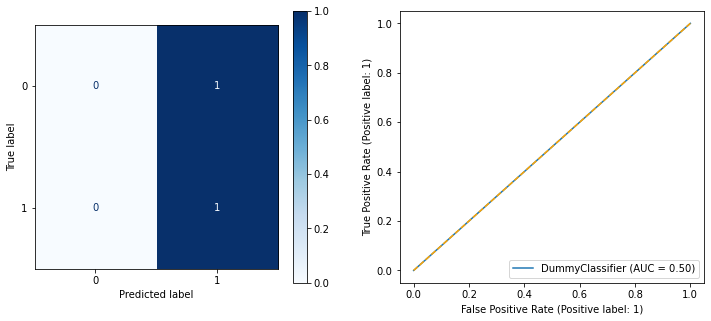

In [46]:
classification(y_test, y_pred, X_test, clf_dummy)

Based on this classification report, it seems that the model has performed poorly for class 0, as it failed to correctly predict any instances of this class. However, it achieved perfect recall for class 1, indicating it successfully identified all instances of this class. The overall accuracy of the model is 50%, suggesting that it did not perform well on this particular dataset.